# Census Income Project

### Problem statement 

 This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

### Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

## The Data

Loading the data by reading the csv file as data frame

In [2]:
df=pd.read_csv('Census.csv')

## Exploratory Data Analysis

Exploratory Data Analysis is use to answer all the question like test assumptions, Analysis the data. The main use of it to prepare the data for modeling

there are lot of ways to reach the goals, we can get a basic description of the data,visualize it identify patterens in it, identify the callenges of using data,etc

### Statistical summary

Summarizing your dataset through descriptive statistics, to use a variety of measurements to better understand your dataset.

##### shape function

shape function gives the dimention of dataframe

In [3]:
df.shape

(32560, 15)

we have 32560 rows and 15 columns

##### head() function

head() function is to display the first 5 rows of dataframe

In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


##### tail() function

tail() function is use to display last 5 row of data frame

In [5]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


#####  sample() function

sample() function is show the sample randomly

In [6]:
df.sample(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
11192,45,Private,195554,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,45,United-States,>50K
32536,30,Private,345898,HS-grad,9,Never-married,Craft-repair,Not-in-family,Black,Male,0,0,46,United-States,<=50K
31998,22,Private,203894,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,15,United-States,<=50K
5804,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
21311,61,Private,97030,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,0,30,United-States,<=50K
1465,35,Private,67728,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,2051,45,United-States,<=50K
20983,47,Private,284871,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,40,United-States,>50K
15883,21,Private,131620,HS-grad,9,Married-spouse-absent,Machine-op-inspct,Own-child,White,Female,0,0,40,Dominican-Republic,<=50K
28379,40,Private,72791,Some-college,10,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,<=50K
20901,34,Private,90614,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,2042,10,United-States,<=50K


##### dtype function

dtypes is use to disply the datatype of data frame

In [7]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

[Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Capital_loss ] are int64 and remaining columns are object dtype

##### info() function

info() function gives the RangeIndex, data columns,column names, non-null count, dtype of dataframe,dtype count and memory size

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


we have 32560 entries are RangeIndex 0 to 32559 and total 15 columns,32560 non-null values in all the columns,and we have 6 colums of int64 dtype and 9 columns of object dtype

##### isnull() function

isnull() function is use to know the null values in data frame, it give th values True and False 

if value is True it indicates null vlaue,else it give false

In [9]:
df.isnull()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


if we have null value it gives True value otherwise it gives False 

##### isnull().sum() function

isnull().sum() it give the count of null values present in column 

In [10]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

there is no null values in the dataframe

### Describe the data

describe function gives the imfomation of count of variables that used to calculate if their is null values that shows less numberrow rows than given in dimention, and function also it gives the infomation of mean, standard deviation,minimum value,25th percentile,50th percentile(which is median),75th percentile and in last it gives maximum value of each column 

In [11]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Mean age is 38 and median is 37, the age range is 17 - 90 while IQR is 28 - 48.

Education number is just encoded data for education, most of the people have max education level of some college.

For both capital gain and capital loss we can see that most of the data is around 0.

For hours per week most of the data is centered towards 40 hours per week.

## Data Visualization

Data visualization is a technique that uses an array of static and interactive visuals within a specific context to help people understand and make sense of large amounts of data. The data is often displayed in a story format that visualizes patterns, trends and correlations that may otherwise go unnoticed.


we are using two libraries 

1.matplotlib.pyplot

2.seaborn

<AxesSubplot:>

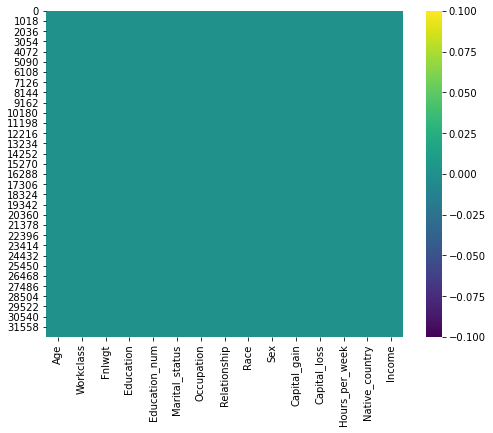

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cmap='viridis')

there is no null values in the dataframe and if we have null values we can see different shade in plot

In [13]:
le=LabelEncoder()
df['Income'] = le.fit_transform(df['Income'])

here we labeled that  <=50K as 0 and >50K as 1

## correlation

Correlation means association - more precisely it is a measure of the extent to which two variables are related. There are three possible results of a correlational study: a positive correlation, a negative correlation, and no correlation.

A positive correlation is a relationship between two variables in which both variables either increase or decrease at the same time. An example would be height and weight. Taller people tend to be heavier.

A negative correlation is a relationship between two variables in which an increase in one variable is associated with a decrease in the other. An example would be height above sea level and temperature. As you climb the mountain (increase in height) it gets colder (decrease in temperature).

A zero correlation exists when there is no relationship between two variables. For example, there is no relationship between the amount of tea drunk and level of intelligence

In [14]:
dfcor=df.corr()
dfcor

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


<AxesSubplot:>

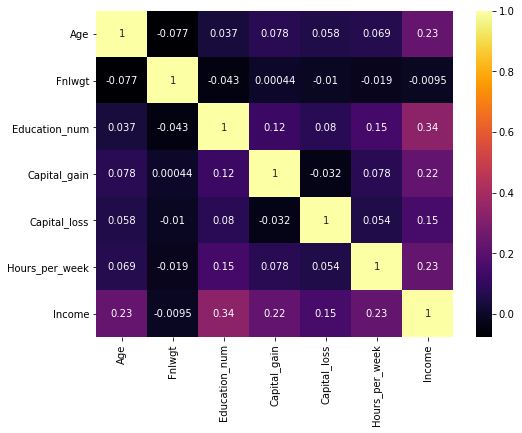

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(dfcor,cmap='inferno',annot=True)

almost all the columns are correlated with target variable but Fnlwgt has correlation almost zero

In [16]:
df=df.drop('Fnlwgt',axis=1)

### Age


Here, I'll bucket the age into separate bins.

1.0-25: Young

2.25-50: Adult

3.50-100: Old

In [17]:
df['Age'].unique()

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [18]:
df['Age'] = pd.cut(df['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

<AxesSubplot:xlabel='Age', ylabel='count'>

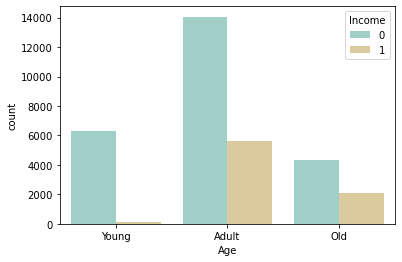

In [19]:
sns.countplot(x = 'Age', hue = 'Income', data = df,palette='BrBG_r')

It appears that there are relatively less Young people who have an income more than $50K.

### Capital_gain and Capital_loss

Rather than having both Capital Gain and Capital Loss, I will use their difference as that is more relevant and gives the change.

In [20]:
df['Capital_diff'] = df['Capital_gain'] - df['Capital_loss']
df.drop(['Capital_gain'], axis = 1, inplace = True)
df.drop(['Capital_loss'], axis = 1, inplace = True)

In [21]:
df['Capital_diff'] = pd.cut(df['Capital_diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])

<AxesSubplot:xlabel='Capital_diff', ylabel='count'>

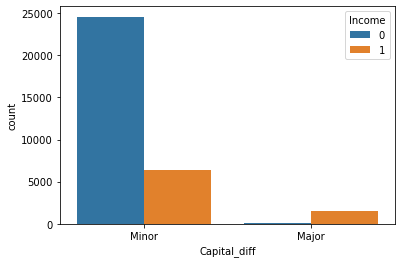

In [22]:
sns.countplot(x = 'Capital_diff', hue = 'Income', data = df)

On taking a look at result, we can see that the for Minor there are more people with incom less than $50K and for Major there are more people with Income greater than $50 K. this is complete agreement with the fact that people who have large Capital_gain, compared to Capital_loss have Income more than $50k

###   Hours_per_week

Taking a look at the histogram for Hours per Week, I can see that the dataset is aligned around the center. I can still create buckets from this data. As usually, the work hours are close to 30-40 hours, I create the buckets as 0-30, 30-40, and 40-100.m

In [23]:
df['Hours_per_week'] = pd.cut(df['Hours_per_week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

<AxesSubplot:xlabel='Hours_per_week', ylabel='count'>

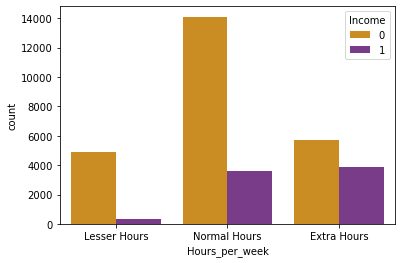

In [24]:
sns.countplot(x = 'Hours_per_week', hue = 'Income', data = df,palette='CMRmap_r')

Taking a look at the plot above, we can see a trend. As the number of hours increase, the number of people earning more than $50K increases in comparison to the people earning less

### Workclass

<AxesSubplot:xlabel='Workclass', ylabel='count'>

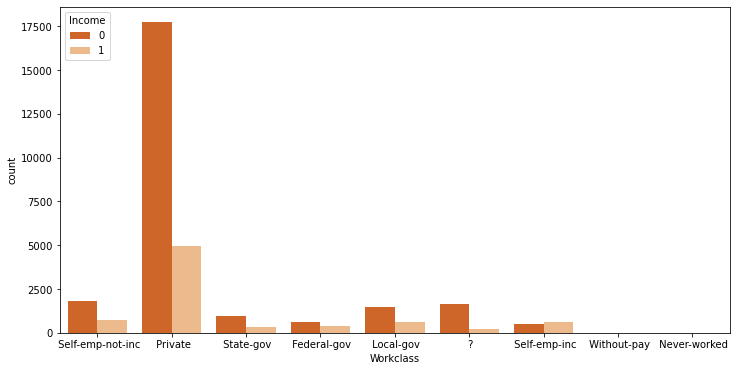

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Workclass', hue = 'Income', data = df,palette='Oranges_r')

Taking a look at the plot above, I can see that there are Work Class values defined as ? which appears to be error data. As it is very less, I'll simply remove these records. Also, the two values Without-pay and Never-worked are negligible and hence it is safe to drop them too.

here we can see most of the records are privte in workclass and we have most of records are having income <=50 

## Education and Education_num

It's a good time to check if there is any relation between Education and Education_num.

<AxesSubplot:xlabel='Education', ylabel='count'>

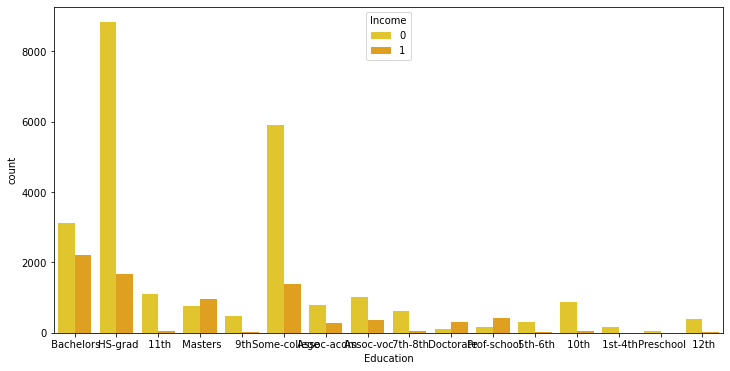

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Education', hue = 'Income', data = df,palette='Wistia')

In [27]:
edu_classes = df['Education'].unique()
for edu_class in edu_classes:
    print("For {}, the Education Number is {}"
          .format(edu_class, df[df['Education'] == edu_class]['Education_num'].unique()))

For  Bachelors, the Education Number is [13]
For  HS-grad, the Education Number is [9]
For  11th, the Education Number is [7]
For  Masters, the Education Number is [14]
For  9th, the Education Number is [5]
For  Some-college, the Education Number is [10]
For  Assoc-acdm, the Education Number is [12]
For  Assoc-voc, the Education Number is [11]
For  7th-8th, the Education Number is [4]
For  Doctorate, the Education Number is [16]
For  Prof-school, the Education Number is [15]
For  5th-6th, the Education Number is [3]
For  10th, the Education Number is [6]
For  1st-4th, the Education Number is [2]
For  Preschool, the Education Number is [1]
For  12th, the Education Number is [8]


by the above code we can clearly says that both columns are same so we can drop any one there is no change in dataframe

In [28]:
df.drop(['Education_num'], axis = 1, inplace = True)
df['Education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School', inplace = True)
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 School           4253
 Masters          1723
 Assoc-voc        1382
 Assoc-acdm       1067
 Prof-school       576
 Doctorate         413
Name: Education, dtype: int64

### Marital_status and Relationship

In [29]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [30]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

Both of them have no missing values. There is some overlap between the two such as if the person is Husband or Wife, then their marital status would be Married. However, as there is no complete overlap.

### Occupation

<AxesSubplot:xlabel='Occupation', ylabel='count'>

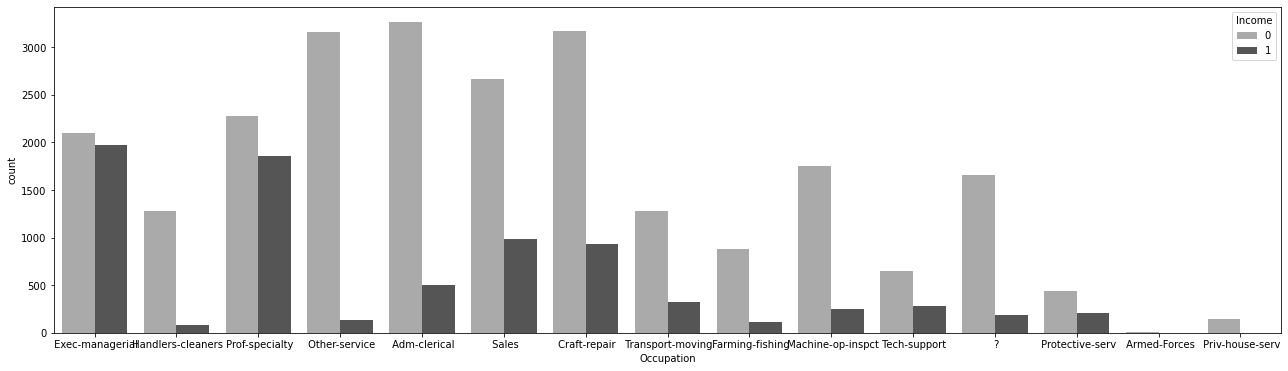

In [31]:
plt.figure(figsize=(22,6))
sns.countplot(x = 'Occupation', hue = 'Income', data = df,palette='binary')

we have most of entries are prof-specialty and we have Armed-Forces less entries and in all these we have more entries have  <=50 income 

In [32]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

### Race

<AxesSubplot:xlabel='Race', ylabel='count'>

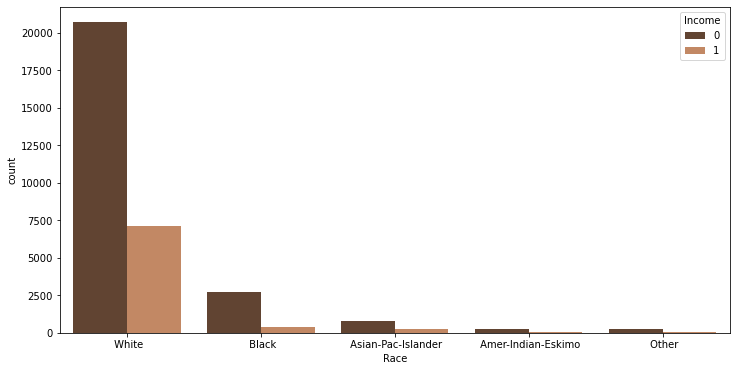

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Race', hue = 'Income', data = df,palette='copper')

The dataset includes majority of information about White race while all other races are lesser in number. I'll combine all other race data into one class as Other.

### Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

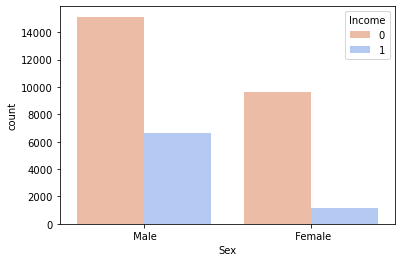

In [34]:
sns.countplot(x = 'Sex', hue = 'Income', data = df,palette='coolwarm_r')

There are more Male participants than Female participants

When we compare the two genders and the corresponding income distribution, more percentage of Males have an Income of more than $50K than Females.

### Native_country

In [35]:
country_count = df['Native_country'].value_counts()
country_count

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

There are some missing values in Country column denoted by ?. we have to fill the ? with mode value

In [36]:
df = df.drop(df[df['Native_country'] == ' ?'].index)

In [37]:
Native_country = np.array(df['Native_country'].unique())
Native_country = np.delete(Native_country, 0)

In [38]:
df['Native_country'].replace(Native_country, 'Other', inplace = True)

<AxesSubplot:xlabel='count', ylabel='Native_country'>

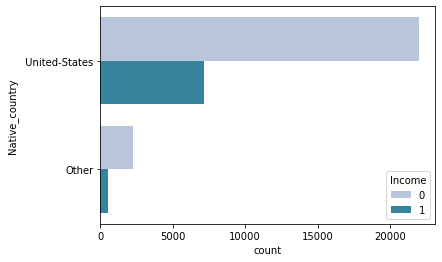

In [39]:
sns.countplot(y = 'Native_country', hue = 'Income', data = df,palette='PuBuGn')

In [40]:
df.head()

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income,Capital_diff
0,Adult,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,Lesser Hours,United-States,0,Minor
1,Adult,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,Normal Hours,United-States,0,Minor
2,Old,Private,School,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,Normal Hours,United-States,0,Minor
3,Adult,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Normal Hours,Other,0,Minor
4,Adult,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,Normal Hours,United-States,0,Minor


In this subsection, we can take all the remaining columns and create important numerical values out of them.

we will use the get_dummies method of pandas to get separate columns for each feature based on the unqiue values in the dataset.

In [41]:
y = df['Income']
x = df.drop(['Income'], axis = 1)
x = pd.get_dummies(x)
print("Total features: {}".format(x.shape[1]))

Total features: 63


### train_test_split.

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 25)

In [43]:
x_train.shape

(22383, 63)

In [44]:
x_test.shape

(9594, 63)

In [45]:
y_train.shape

(22383,)

In [46]:
y_test.shape

(9594,)

## Appyting Machine Learning

In [47]:
model = [GaussianNB(),LogisticRegression(),
               SVC(), 
               DecisionTreeClassifier(), 
               RandomForestClassifier(), 
               GradientBoostingClassifier()]
model_names = ["Gaussian Naive Bayes",
                "LogisticRegression",
                    "Support Vector Classifier", 
                    "Decision Tree Classifier", 
                    "Random Forest Classifier", 
                    "Gradient Boosting Classifier"]
accuracies = []

In [48]:
for i in range(len(model)):
    classifier = model[i]
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    print("{}:".format(model_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_test, pred)))
    print("accuracy score:",accuracy_score(y_test,pred))
    print("confusion matrix:",confusion_matrix(y_test,pred))
    print("classification report:",classification_report(y_test,pred))
    accuracy = accuracy_score(y_test, pred)*100
    accuracies.append(accuracy)
    scr=cross_val_score(classifier,x,y,cv=5)
    print("Cross validation score:",scr.mean())
    print("******************************************************************")

Gaussian Naive Bayes:
F1 score: 0.56
accuracy score: 0.6436314363143631
confusion matrix: [[3976 3280]
 [ 139 2199]]
classification report:               precision    recall  f1-score   support

           0       0.97      0.55      0.70      7256
           1       0.40      0.94      0.56      2338

    accuracy                           0.64      9594
   macro avg       0.68      0.74      0.63      9594
weighted avg       0.83      0.64      0.67      9594

Cross validation score: 0.6722010189128174
******************************************************************
LogisticRegression:
F1 score: 0.64
accuracy score: 0.8439649781113195
confusion matrix: [[6785  471]
 [1026 1312]]
classification report:               precision    recall  f1-score   support

           0       0.87      0.94      0.90      7256
           1       0.74      0.56      0.64      2338

    accuracy                           0.84      9594
   macro avg       0.80      0.75      0.77      9594
weighted avg 

## Accuracy Plot

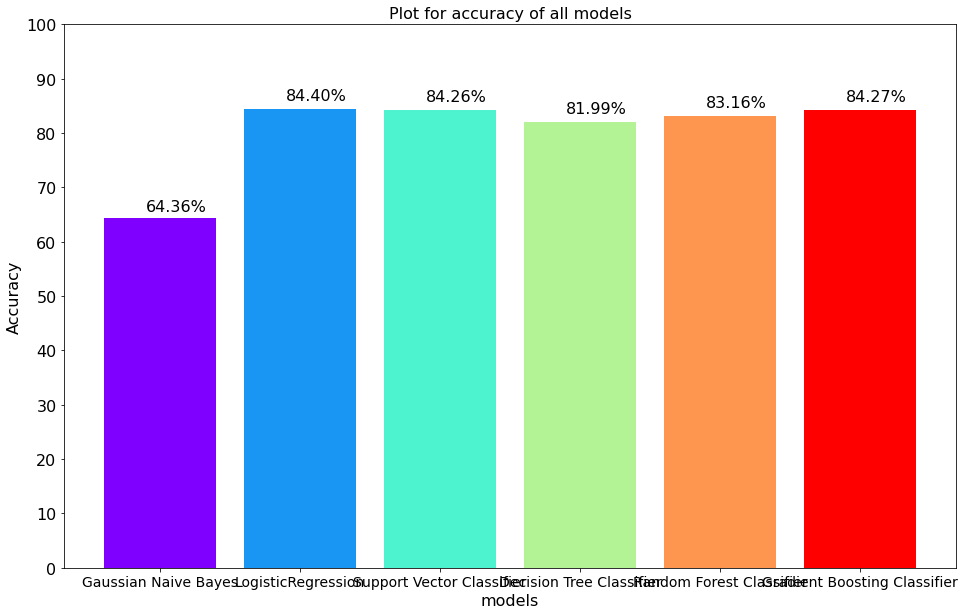

In [49]:
from matplotlib.cm import rainbow

plt.figure(figsize = (16, 10))
colors = rainbow(np.linspace(0, 1, len(model)))
barplot = plt.bar(model_names, accuracies, color = colors)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks(fontsize = 14)
plt.xlabel("models", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all models", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)

As we can observe except Gaussian Naive Bayes all the models has above 80% accuracy

In all model we are getting same result, to know which model is best we have to check difference of cross validation score and accuracy score then we can know which is the best model

here we can clearly see that RandomForestclassifier

## ROC Curve

Let's also analyse the ROC Curve for the predictions for income more than $50K.

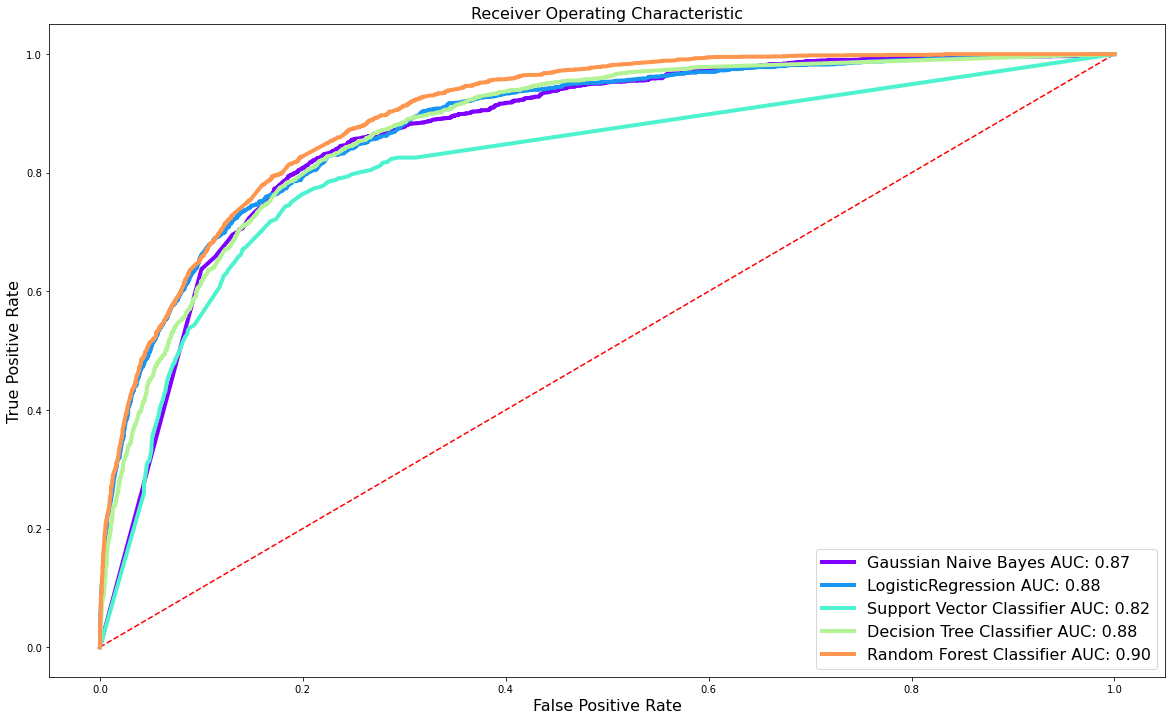

In [50]:
from sklearn.metrics import roc_curve, auc

models = [GaussianNB(), 
               SVC(kernel = 'rbf', probability = True), 
               DecisionTreeClassifier(), 
               RandomForestClassifier(), 
               GradientBoostingClassifier()]
plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

for i in range(len(models)):
    classifier = models[i]
    classifier.fit(x_train, y_train)
    probs = classifier.predict_proba(x_test)
    # Reading probability of second class
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    label = model_names[i] + ' AUC:' + ' {0:.2f}'.format(roc_auc)
    plt.plot(fpr, tpr, c = colors[i], label = label, linewidth = 4)
    
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

Here Random Forest Classifier has the maximum Area Under Curve with a value of 0.90.

## Hyper parameter tuning

In [51]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_estimators":[100,200,300,400,500,600,700,800],"criterion":["gini","entropy"]
              ,"min_samples_split":[2,5,8,10],'max_features': ['auto', 'log2'],
             "min_samples_leaf":[1,3,5,6,7]}

gcv_rf= GridSearchCV(RandomForestClassifier(),parameters,n_jobs=-1,cv=8,verbose=2)

gcv_rf.fit(x_train,y_train)

Fitting 8 folds for each of 640 candidates, totalling 5120 fits


GridSearchCV(cv=8, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 6, 7],
                         'min_samples_split': [2, 5, 8, 10],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800]},
             verbose=2)

In [53]:
gcv_rf.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 10,
 'n_estimators': 600}

In [54]:
gcv_pred=gcv_rf.predict(x_test)

In [55]:
print(accuracy_score(y_test,gcv_pred)*100)

84.15676464456952


### Saving the model

In [56]:
import joblib
joblib.dump(gcv_rf,"Census-income-project.pkl")

['Census-income-project.pkl']

### Loading the saved model

In [57]:
model=joblib.load("Census-income-project.pkl")

In [58]:
prediction=model.predict(x_test)

In [59]:
print(accuracy_score(y_test,prediction)*100)

84.15676464456952
